# <center>Projeto 2</center>
## <center>Danilo Henrique Cordeiro - 6791651 </center>
## <center>Marina Kako - 9763151 </center>

### <center> <a id="lista">Exercícios</a> </center>

[Exercício 01](#1)
[Exercício 02](#2)
[Exercício 03](#3)
[Exercício 04](#4)
[Exercício 05](#5)
[Exercício 06](#6)
[Exercício 07](#7)
[Exercício 08](#8)
[Exercício 09](#9)
[Exercício 10](#10)

## Imports

In [4]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import LFR_benchmark_graph
from scipy.linalg import expm
from scipy.sparse import csc_matrix
import pandas as pd
import seaborn as sns
import osmnx as ox
ox.config(use_cache=True, log_console=True)
import os
np.random.seed(50)

Se tiver algum erro com a importação do seaborn e/ou scipy execute a linha abaixo para instalar ele e roda as importações novamente

In [ ]:
%%bash
pip install seaborn
pip install scipy

## <a id="1">EX1</a>

Vamos ler as redes, e transformar todas em redes sem direção (algumas já são, mas vamos transformar mesmo assim)

In [27]:
eroad = nx.Graph()
eroad = nx.read_edgelist('redes/euroad', nodetype=int, comments='%')
eroad = eroad.to_undirected()
eroad.remove_edges_from(nx.selfloop_edges(eroad))

hams = nx.Graph()
hams = nx.read_edgelist('redes/hamster', nodetype=int, comments='%')
hams = hams.to_undirected()
hams.remove_edges_from(nx.selfloop_edges(hams))

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('redes/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)
elegans.remove_edges_from(nx.selfloop_edges(elegans))

airport = nx.Graph()
airport = nx.read_edgelist("redes/USairport500.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()
airport.remove_edges_from(nx.selfloop_edges(airport))

Vamos pegar a maior componente das redes para que possamos realizar os cálculos para este exercício

In [28]:
eroad_cc = max(nx.connected_component_subgraphs(eroad), key=len)
hams_cc = max(nx.connected_component_subgraphs(hams), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport), key=len)

### (i)Degree centrality

Vamos calcular agora o degree centrality das redes

In [45]:
vk_eroad = dict(eroad.degree())
vk_eroad = list(vk_eroad.values())

vk_hams = dict(hams.degree())
vk_hams = list(vk_hams.values())

vk_elegans = dict(elegans.degree())
vk_elegans = list(vk_elegans.values())

vk_airport = dict(airport.degree())
vk_airport = list(vk_airport.values())

A seguir temos a distribuição do degree centrality de cada rede

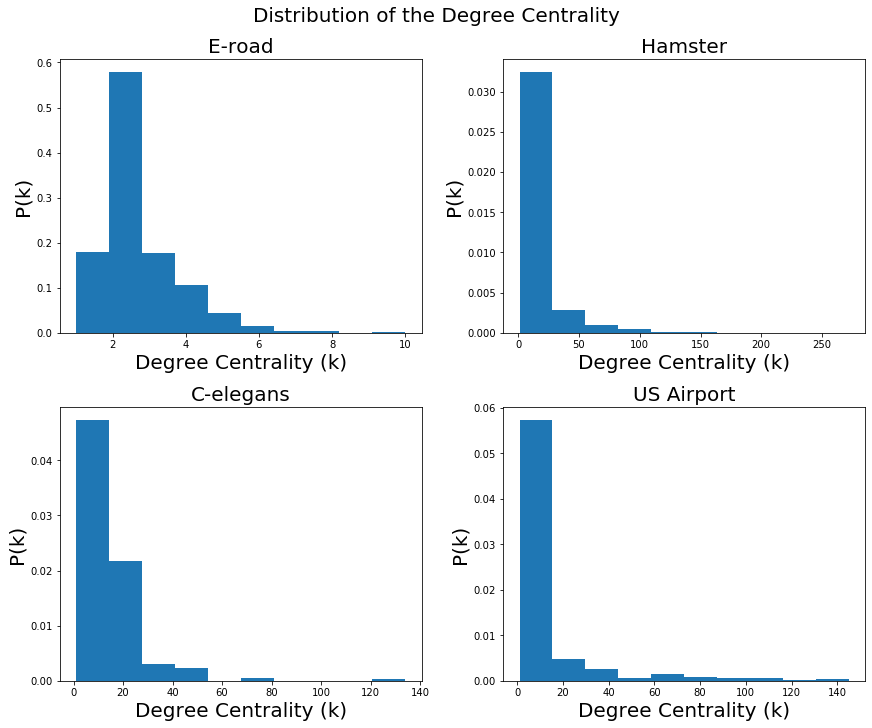

In [46]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Degree Centrality", fontsize=20)

axs[0,0].hist(vk_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(k)", fontsize=20)
axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[0,1].hist(vk_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(k)", fontsize=20)
axs[0,1].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,0].hist(vk_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(k)", fontsize=20)
axs[1,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,1].hist(vk_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(k)", fontsize=20)
axs[1,1].set_xlabel("Degree Centrality (k)", fontsize=20)

plt.show(True)

### (ii)K-core

Vamos agora calcular os K-core de cada rede

In [40]:
KC_eroad = dict(nx.core_number(eroad))
KC_eroad = list(KC_eroad.values())

KC_hams = dict(nx.core_number(hams))
KC_hams = list(KC_hams.values())

KC_elegans = dict(nx.core_number(elegans))
KC_elegans = list(KC_elegans.values())

KC_airport = dict(nx.core_number(airport))
KC_airport = list(KC_airport.values())

Vamos ver a distribuição dos k-core

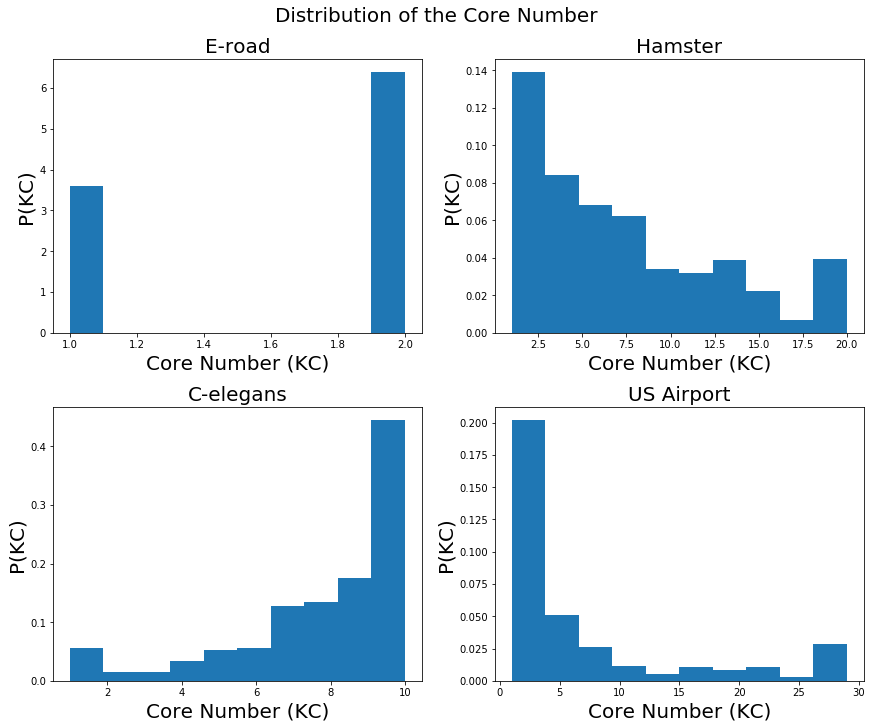

In [41]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Core Number", fontsize=20)

axs[0,0].hist(KC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(KC)", fontsize=20)
axs[0,0].set_xlabel("Core Number (KC)", fontsize=20)

axs[0,1].hist(KC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(KC)", fontsize=20)
axs[0,1].set_xlabel("Core Number (KC)", fontsize=20)

axs[1,0].hist(KC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(KC)", fontsize=20)
axs[1,0].set_xlabel("Core Number (KC)", fontsize=20)

axs[1,1].hist(KC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(KC)", fontsize=20)
axs[1,1].set_xlabel("Core Number (KC)", fontsize=20)

plt.show(True)

### (iii)Closeness Centrality

Vamos calcular o closeness centrality e em seguir exibi-los

In [47]:
CLC_eroad = dict(nx.closeness_centrality(eroad))
CLC_eroad = list(CLC_eroad.values())

CLC_hams = dict(nx.closeness_centrality(hams))
CLC_hams = list(CLC_hams.values())

CLC_elegans = dict(nx.closeness_centrality(elegans))
CLC_elegans = list(CLC_elegans.values())

CLC_airport = dict(nx.closeness_centrality(airport))
CLC_airport = list(CLC_airport.values())

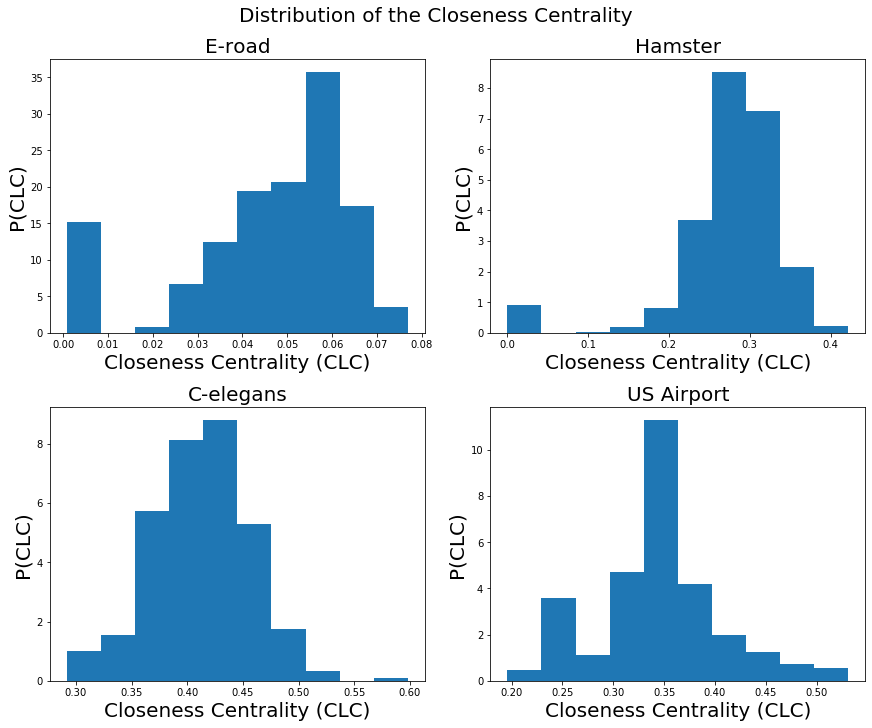

In [48]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Closeness Centrality", fontsize=20)

axs[0,0].hist(CLC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(CLC)", fontsize=20)
axs[0,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[0,1].hist(CLC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(CLC)", fontsize=20)
axs[0,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,0].hist(CLC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(CLC)", fontsize=20)
axs[1,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,1].hist(CLC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(CLC)", fontsize=20)
axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

plt.show(True)

### (iv)Betweenness Centrality

In [49]:
B_eroad = dict(nx.betweenness_centrality(eroad))
B_eroad = list(B_eroad.values())

B_hams = dict(nx.betweenness_centrality(hams))
B_hams = list(B_hams.values())

B_elegans = dict(nx.betweenness_centrality(elegans))
B_elegans = list(B_elegans.values())

B_airport = dict(nx.betweenness_centrality(airport))
B_airport = list(B_airport.values())

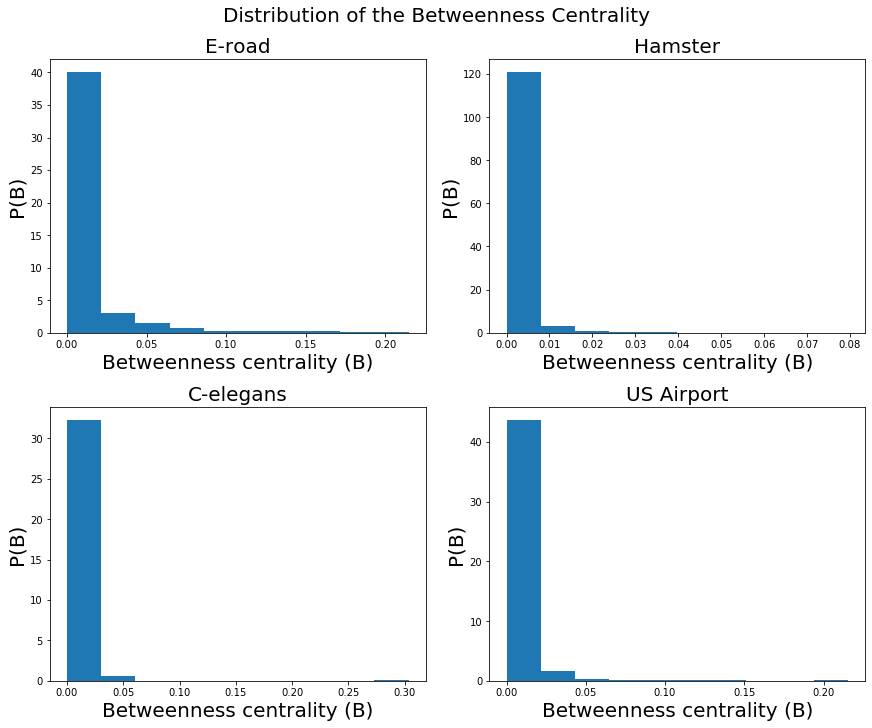

In [50]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Betweenness Centrality", fontsize=20)

axs[0,0].hist(B_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(B)", fontsize=20)
axs[0,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[0,1].hist(B_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(B)", fontsize=20)
axs[0,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,0].hist(B_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(B)", fontsize=20)
axs[1,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,1].hist(B_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(B)", fontsize=20)
axs[1,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

plt.show(True)

### (v)Eigenvector Centrality

In [51]:
EC_eroad = dict(nx.eigenvector_centrality(eroad, max_iter = 1000))
EC_eroad= list(EC_eroad.values())

EC_hams = dict(nx.eigenvector_centrality(hams, max_iter = 1000))
EC_hams= list(EC_hams.values())

EC_elegans = dict(nx.eigenvector_centrality(elegans, max_iter = 1000))
EC_elegans= list(EC_elegans.values())

EC_airport = dict(nx.eigenvector_centrality(airport, max_iter = 1000))
EC_airport= list(EC_airport.values())

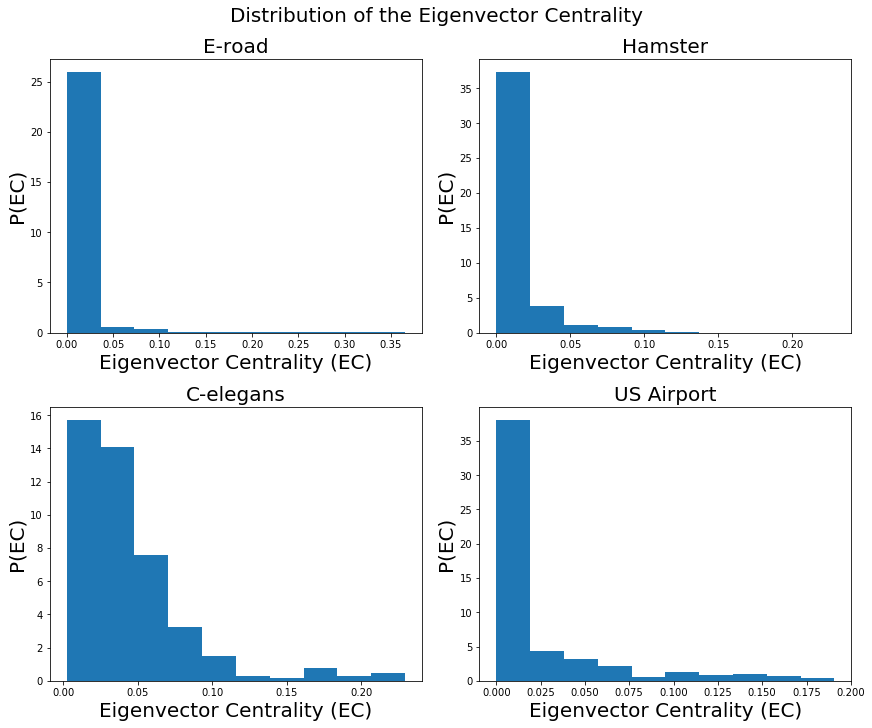

In [52]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Eigenvector Centrality", fontsize=20)

axs[0,0].hist(EC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(EC)", fontsize=20)
axs[0,0].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[0,1].hist(EC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(EC)", fontsize=20)
axs[0,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[1,0].hist(EC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(EC)", fontsize=20)
axs[1,0].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[1,1].hist(EC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(EC)", fontsize=20)
axs[1,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

plt.show(True)

### (vi)Pagerank

In [53]:
PR_eroad = dict(nx.pagerank(eroad, alpha=0.85))
PR_eroad= list(PR_eroad.values())

PR_hams = dict(nx.pagerank(hams, alpha=0.85))
PR_hams= list(PR_hams.values())

PR_elegans = dict(nx.pagerank(elegans, alpha=0.85))
PR_elegans= list(PR_elegans.values())

PR_airport = dict(nx.pagerank(airport, alpha=0.85))
PR_airport= list(PR_airport.values())

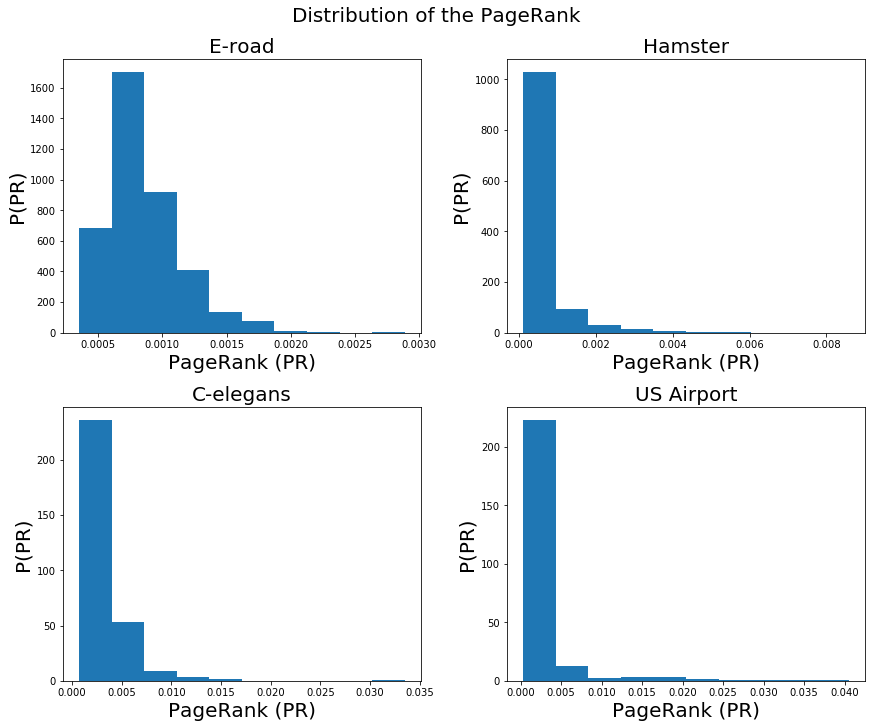

In [54]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the PageRank", fontsize=20)

axs[0,0].hist(PR_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(PR)", fontsize=20)
axs[0,0].set_xlabel("PageRank (PR)", fontsize=20)

axs[0,1].hist(PR_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(PR)", fontsize=20)
axs[0,1].set_xlabel("PageRank (PR)", fontsize=20)

axs[1,0].hist(PR_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(PR)", fontsize=20)
axs[1,0].set_xlabel("PageRank (PR)", fontsize=20)

axs[1,1].hist(PR_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(PR)", fontsize=20)
axs[1,1].set_xlabel("PageRank (PR)", fontsize=20)

plt.show(True)

### (vii)Random Walk Accessibility

In [34]:
def acc(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(i, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

In [86]:
RW_eroad = acc(eroad)
RW_hams = acc(hams)
RW_elegans = acc(elegans)
RW_airport = acc(airport)

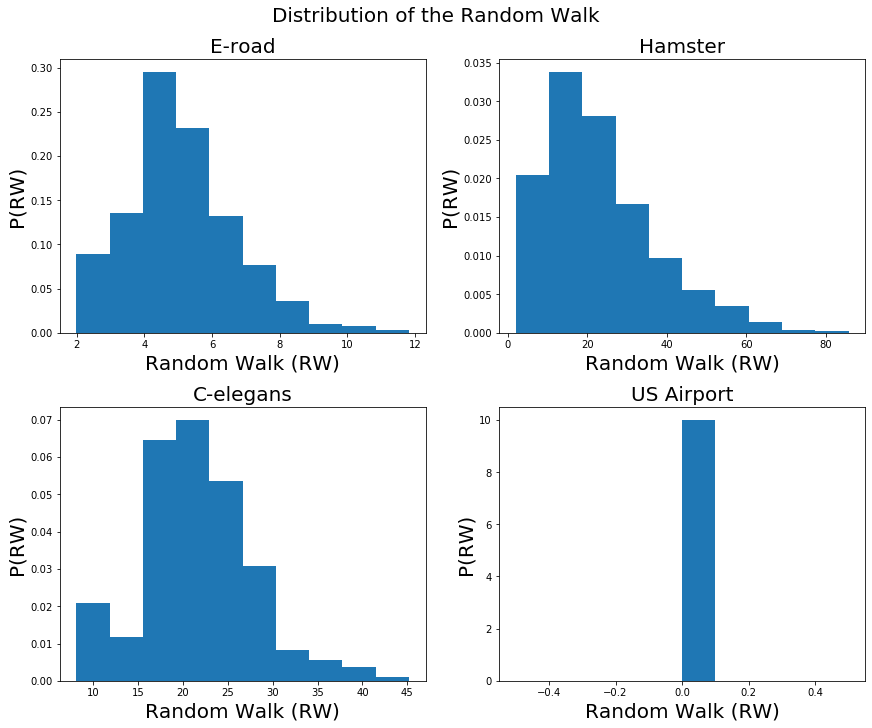

In [87]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Random Walk", fontsize=20)

axs[0,0].hist(RW_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(RW)", fontsize=20)
axs[0,0].set_xlabel("Random Walk (RW)", fontsize=20)

axs[0,1].hist(RW_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(RW)", fontsize=20)
axs[0,1].set_xlabel("Random Walk (RW)", fontsize=20)

axs[1,0].hist(RW_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(RW)", fontsize=20)
axs[1,0].set_xlabel("Random Walk (RW)", fontsize=20)

axs[1,1].hist(RW_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(RW)", fontsize=20)
axs[1,1].set_xlabel("Random Walk (RW)", fontsize=20)

plt.show(True)

### (viii)Communicability Centrality

In [32]:
def comm_cent(G):
    if nx.is_weighted(G):
        tg = nx.Graph()
        for u, v, w in G.edges(data=True):
            if w['weight'] > 0:
                tg.add_edge(u,v)
        G = tg
    A = nx.adjacency_matrix(G)
    C = expm(csc_matrix(A))
    N = len(G)
    com = np.zeros(N)
    for i in range(0, N):
        com[i] = C[i,i]
    return com

In [74]:
CC_eroad = comm_cent(eroad)
CC_hams = comm_cent(hams)
CC_elegans = comm_cent(elegans)
CC_airport = comm_cent(airport)

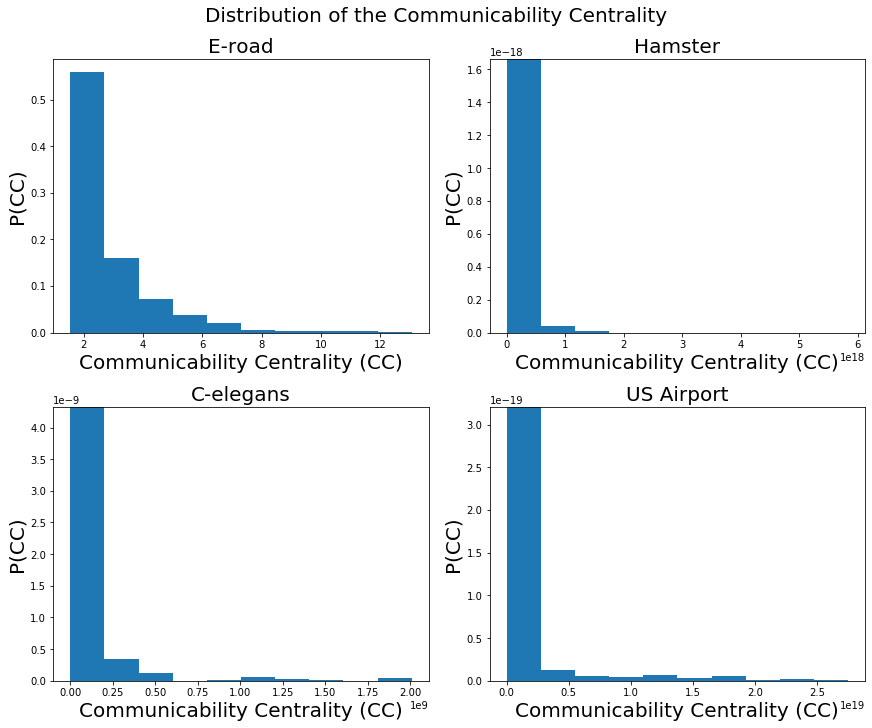

In [77]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Communicability Centrality", fontsize=20)

axs[0,0].hist(CC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(CC)", fontsize=20)
axs[0,0].set_xlabel("Communicability Centrality (CC)", fontsize=20)

axs[0,1].hist(CC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(CC)", fontsize=20)
axs[0,1].set_xlabel("Communicability Centrality (CC)", fontsize=20)

axs[1,0].hist(CC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(CC)", fontsize=20)
axs[1,0].set_xlabel("Communicability Centrality (CC)", fontsize=20)

axs[1,1].hist(CC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(CC)", fontsize=20)
axs[1,1].set_xlabel("Communicability Centrality (CC)", fontsize=20)

plt.show(True)

### Matriz de Correlação

In [88]:
df_eroad = pd.DataFrame({'K':vk_eroad,'CLC':CLC_eroad,'B':B_eroad,'EC':EC_eroad,'PR':PR_eroad, 'CC':CC_eroad, 'RW':RW_eroad})
df_hams = pd.DataFrame({'K':vk_hams,'CLC':CLC_hams,'B':B_hams,'EC':EC_hams,'PR':PR_hams, 'CC':CC_hams, 'RW':RW_hams})
df_elegans = pd.DataFrame({'K':vk_elegans,'CLC':CLC_elegans,'B':B_elegans,'EC':EC_elegans,'PR':PR_elegans, 'CC':CC_elegans, 'RW':RW_elegans})
df_airport = pd.DataFrame({'K':vk_airport,'CLC':CLC_airport,'B':B_airport,'EC':EC_airport,'PR':PR_airport, 'CC':CC_airport, 'RW':RW_airport})

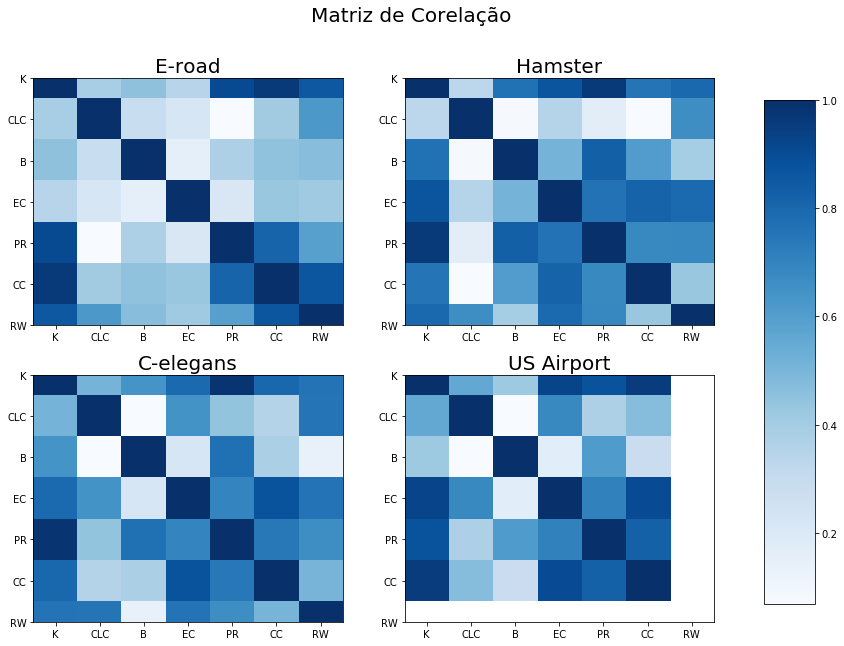

In [89]:
corr_eorad = df_eroad.corr()
corr_hams = df_hams.corr()
corr_elegans = df_elegans.corr()
corr_airport = df_airport.corr()

fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize=(14,10))
fig.suptitle("Matriz de Corelação", fontsize=20)

im = axs[0,0].imshow(corr_eorad, cmap='Blues', interpolation='none', aspect='auto')
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_xticks(np.arange(len(corr_eorad)))
axs[0,0].set_yticks(np.arange(len(corr_eorad)))
axs[0,0].set_xticklabels(corr_eorad.columns)
axs[0,0].set_yticklabels(corr_eorad.columns);

axs[0,1].imshow(corr_hams, cmap='Blues', interpolation='none', aspect='auto')
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_xticks(np.arange(len(corr_hams)))
axs[0,1].set_yticks(np.arange(len(corr_hams)))
axs[0,1].set_xticklabels(corr_hams.columns)
axs[0,1].set_yticklabels(corr_hams.columns);

axs[1,0].imshow(corr_elegans, cmap='Blues', interpolation='none', aspect='auto')
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_xticks(np.arange(len(corr_elegans)))
axs[1,0].set_yticks(np.arange(len(corr_elegans)))
axs[1,0].set_xticklabels(corr_elegans.columns)
axs[1,0].set_yticklabels(corr_elegans.columns);

axs[1,1].imshow(corr_airport, cmap='Blues', interpolation='none', aspect='auto')
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_xticks(np.arange(len(corr_airport)))
axs[1,1].set_yticks(np.arange(len(corr_airport)))
axs[1,1].set_xticklabels(corr_airport.columns)
axs[1,1].set_yticklabels(corr_airport.columns);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show(True)

Ao analisar as matrizes de correlações podemos ver que as maiores relações estão entre o Page Rank (PR) e o Degree Centrality (K). Isso se dá porque as duas medidas levam em consideração a quantidade de conexões que o nó tem dentro da rede, no entanto o PageRank também leva em conta as conexões que suas conexões fazem e por isso as medidas não idênticas.

[Voltar para o topo](#lista)

## <a id="2">EX2</a>

Foram escolhidos os mapas da cidade de Londres, a ilha de Manhattan, a cidade de Piedmont - CA dos EUA e a ilha de Hong Kong

In [208]:
London = ox.graph_from_place('City of London, UK', network_type='drive', which_result=2)

In [209]:
Manhattan = ox.graph_from_place('Manhattan Island, New York', network_type='drive')

In [210]:
Piedmont = ox.graph_from_place('Piedmont, California', network_type='drive')

In [211]:
Hong_Kong = ox.graph_from_place('Hong Kong Island', network_type='drive')

### (i) Degree Centrality

In [212]:
vk_London = dict(London.degree())
vk_London = list(vk_London.values())

vk_Man = dict(Manhattan.degree())
vk_Man = list(vk_Man.values())

vk_Pied = dict(Piedmont.degree())
vk_Pied = list(vk_Pied.values())

vk_Hong = dict(Hong_Kong.degree())
vk_Hong = list(vk_Hong.values())

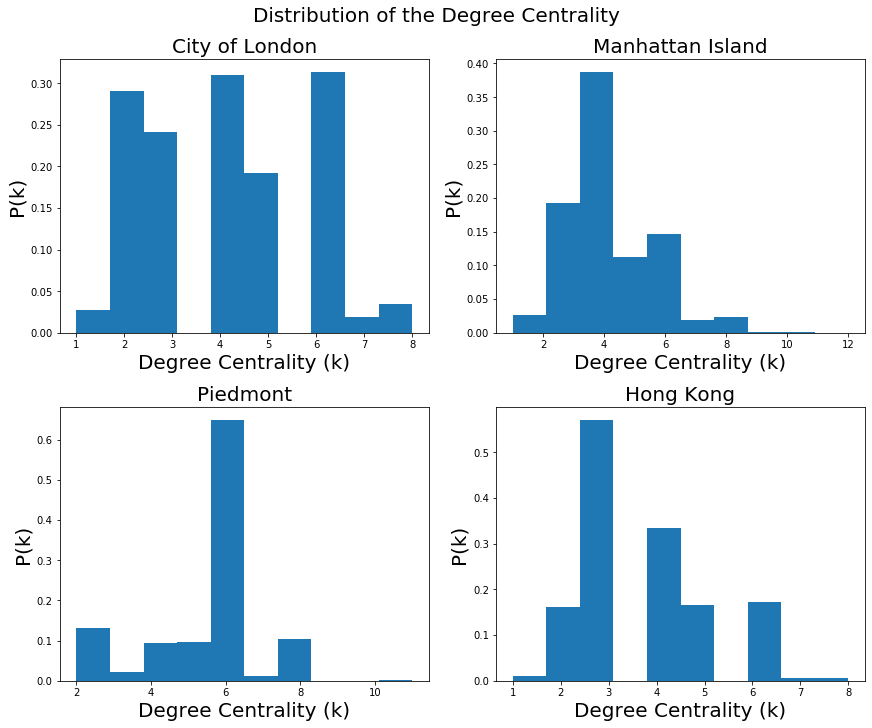

In [213]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Degree Centrality", fontsize=20)

axs[0,0].hist(vk_London, density=True)
axs[0,0].set_title("City of London", fontsize=20)
axs[0,0].set_ylabel("P(k)", fontsize=20)
axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[0,1].hist(vk_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(k)", fontsize=20)
axs[0,1].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,0].hist(vk_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(k)", fontsize=20)
axs[1,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,1].hist(vk_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(k)", fontsize=20)
axs[1,1].set_xlabel("Degree Centrality (k)", fontsize=20)

plt.show(True)

### (ii) Closeness Centrality

In [218]:
CLC_London = dict(nx.closeness_centrality(London))
CLC_London = list(CLC_London.values())

CLC_Man = dict(nx.closeness_centrality(Manhattan))
CLC_Man = list(CLC_Man.values())

CLC_Pied = dict(nx.closeness_centrality(Piedmont))
CLC_Pied = list(CLC_Pied.values())

CLC_Hong = dict(nx.closeness_centrality(Hong_Kong))
CLC_Hong = list(CLC_Hong.values())

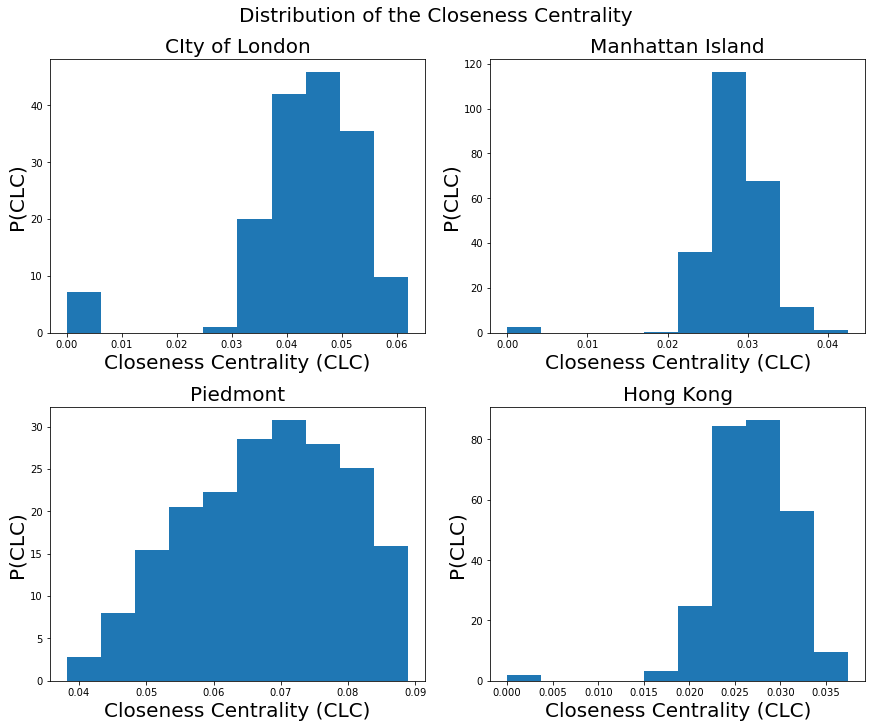

In [219]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Closeness Centrality", fontsize=20)

axs[0,0].hist(CLC_London, density=True)
axs[0,0].set_title("CIty of London", fontsize=20)
axs[0,0].set_ylabel("P(CLC)", fontsize=20)
axs[0,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[0,1].hist(CLC_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(CLC)", fontsize=20)
axs[0,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,0].hist(CLC_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(CLC)", fontsize=20)
axs[1,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,1].hist(CLC_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(CLC)", fontsize=20)
axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

plt.show(True)

### (iii) Betweenness Centrality

In [216]:
B_London = dict(nx.betweenness_centrality(London))
B_London = list(B_London.values())

B_Man = dict(nx.betweenness_centrality(Manhattan))
B_Man = list(B_Man.values())

B_Pied = dict(nx.betweenness_centrality(Piedmont))
B_Pied = list(B_Pied.values())

B_Hong = dict(nx.betweenness_centrality(Hong_Kong))
B_Hong = list(B_Hong.values())

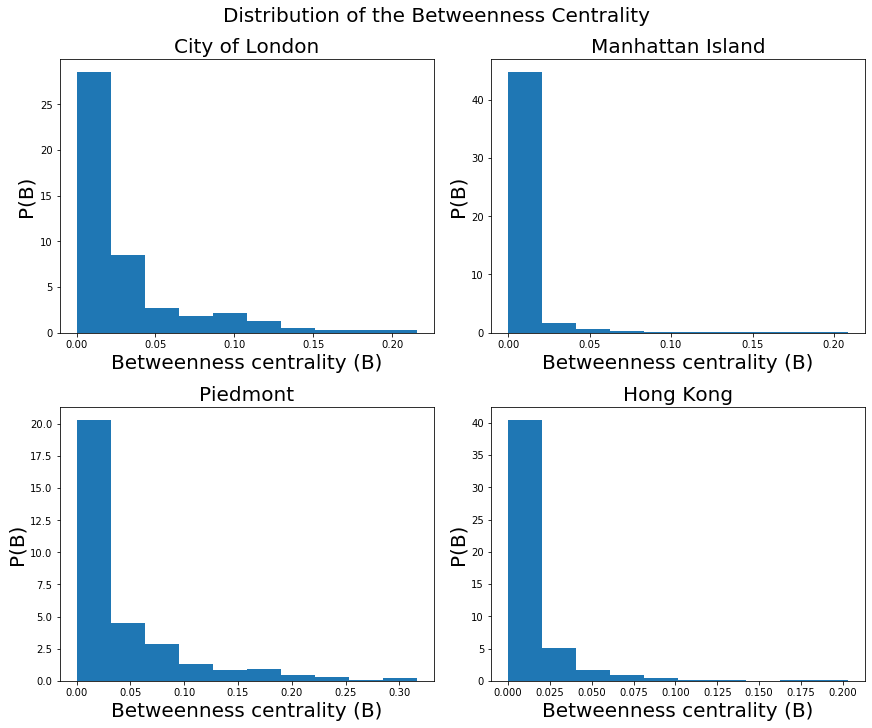

In [217]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Betweenness Centrality", fontsize=20)

axs[0,0].hist(B_London, density=True)
axs[0,0].set_title("City of London", fontsize=20)
axs[0,0].set_ylabel("P(B)", fontsize=20)
axs[0,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[0,1].hist(B_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(B)", fontsize=20)
axs[0,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,0].hist(B_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(B)", fontsize=20)
axs[1,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,1].hist(B_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(B)", fontsize=20)
axs[1,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

plt.show(True)

Como todas as redes possuem a medida de betweenness centrality similar (pico perto de 0), vamos analisar o degree centrality e o closeness centrality. Piedmont apresenta grande distribuição de closeness centrality, isso indica que a maioria dos nós estão próximos uns dos outros e, portanto, é mais fácil de se navegar por ela. 

Além disso, a cidade também apresenta grande degree centrality, o que indica que os nós são muito conectados. Apesar de Londres também apresentar alto degree centrality, a cidade não conta com uma alta distribuição de closeness centrality.

[Voltar para o topo](#lista)

## <a id="3">EX3</a>

Vamos ler as redes

In [5]:
proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

power = nx.Graph()
power = nx.nx.read_gml('redes/power.gml', label=None)
power = power.to_undirected()
power = nx.convert_node_labels_to_integers(power, first_label=0)

elegans07 = nx.Graph()
elegans07 = nx.read_edgelist("redes/wi2007.txt", nodetype=str)
elegans07 = elegans07.to_undirected()
elegans07 = nx.convert_node_labels_to_integers(elegans07, first_label=0)

elegans04 = nx.Graph()
elegans04 = nx.read_edgelist("redes/wi2004.txt", nodetype=str)
elegans04 = elegans04.to_undirected()
elegans04 = nx.convert_node_labels_to_integers(elegans04, first_label=0)

df = pd.read_csv('redes/rdependencies.csv')
Rdep = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr=None)
Rdep = Rdep.to_undirected()

In [34]:
vk_proteins = dict(proteins.degree())
vk_proteins = list(vk_proteins.values())

vk_power = dict(power.degree())
vk_power = list(vk_power.values())

vk_elegans07 = dict(elegans07.degree())
vk_elegans07 = list(vk_elegans07.values())

vk_elegans04 = dict(elegans04.degree())
vk_elegans04 = list(vk_elegans04.values())

vk_Rdep = dict(Rdep.degree())
vk_Rdep = list(vk_Rdep.values())

In [35]:
nx.eigenvector_centrality(eroad, max_iter = 1000)

EC_proteins = dict(nx.eigenvector_centrality(proteins, max_iter = 1000))
EC_proteins = list(EC_proteins.values())

EC_power = dict(nx.eigenvector_centrality(power, max_iter = 1000))
EC_power = list(EC_power.values())

EC_elegans07 = dict(nx.eigenvector_centrality(elegans07, max_iter = 1000))
EC_elegans07 = list(EC_elegans07.values())

EC_elegans04 = dict(nx.eigenvector_centrality(elegans04, max_iter = 1000))
EC_elegans04 = list(EC_elegans04.values())

EC_Rdep = dict(nx.eigenvector_centrality(Rdep, max_iter = 1000))
EC_Rdep = list(EC_Rdep.values())

In [36]:
PR_proteins = dict(nx.pagerank(proteins, alpha=0.85))
PR_proteins = list(PR_proteins.values())

PR_power = dict(nx.pagerank(proteins, alpha=0.85))
PR_power = list(PR_power.values())

PR_elegans07 = dict(nx.pagerank(proteins, alpha=0.85))
PR_elegans07 = list(PR_elegans07.values())

PR_elegans04 = dict(nx.pagerank(proteins, alpha=0.85))
PR_elegans04 = list(PR_elegans04.values())

PR_Rdep = dict(nx.pagerank(proteins, alpha=0.85))
PR_Rdep = list(PR_Rdep.values())

In [37]:
CLC_proteins = dict(nx.closeness_centrality(proteins))
CLC_proteins = list(CLC_proteins.values())

CLC_power = dict(nx.closeness_centrality(power))
CLC_power = list(CLC_power.values())

CLC_elegans07 = dict(nx.closeness_centrality(elegans07))
CLC_elegans07 = list(CLC_elegans07.values())

CLC_elegans04 = dict(nx.closeness_centrality(elegans04))
CLC_elegans04 = list(CLC_elegans04.values())

CLC_Rdep = dict(nx.closeness_centrality(Rdep))
CLC_Rdep = list(CLC_Rdep.values())

In [38]:
def plot_dist(vk, EC, PR, CLC, network):
    fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
    fig.suptitle(network, fontsize=20)

    axs[0,0].hist(vk, density=True)
    axs[0,0].set_title("Distribution of the Degree Centrality", fontsize=20)
    axs[0,0].set_ylabel("P(k)", fontsize=20)
    axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

    axs[0,1].hist(EC, density=True)
    axs[0,1].set_title("Distribution of the Eigenvector Centrality", fontsize=20)
    axs[0,1].set_ylabel("P(EC)", fontsize=20)
    axs[0,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

    axs[1,0].hist(PR, density=True)
    axs[1,0].set_title("Distribution of the PageRank", fontsize=20)
    axs[1,0].set_ylabel("P(PR)", fontsize=20)
    axs[1,0].set_xlabel("Pagerank (PR)", fontsize=20)

    axs[1,1].hist(CLC, density=True)
    axs[1,1].set_title("Distribution of the Closeness Centrality", fontsize=20)
    axs[1,1].set_ylabel("P(CLC)", fontsize=20)
    axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

    plt.show(True)

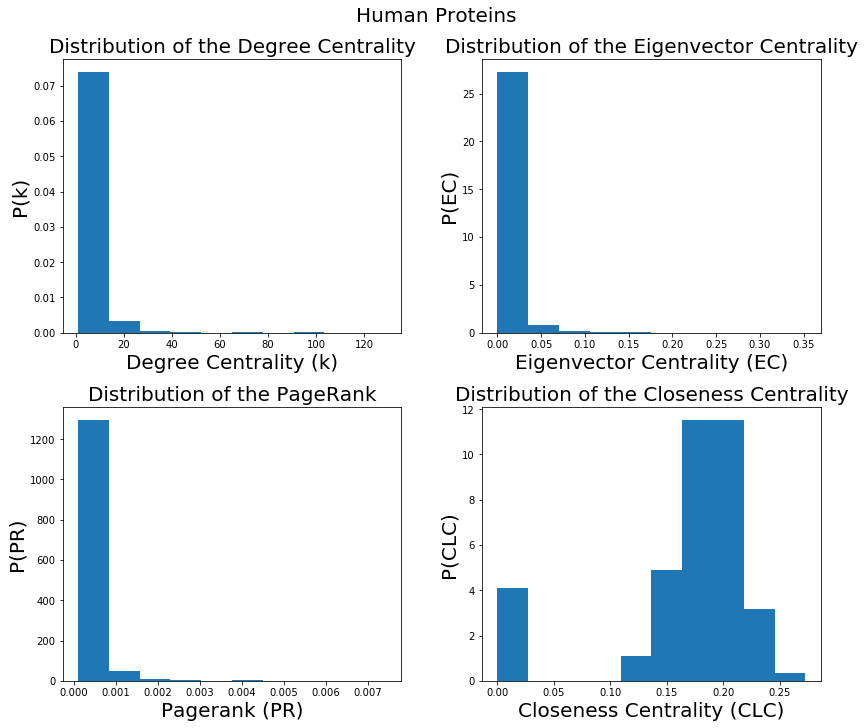

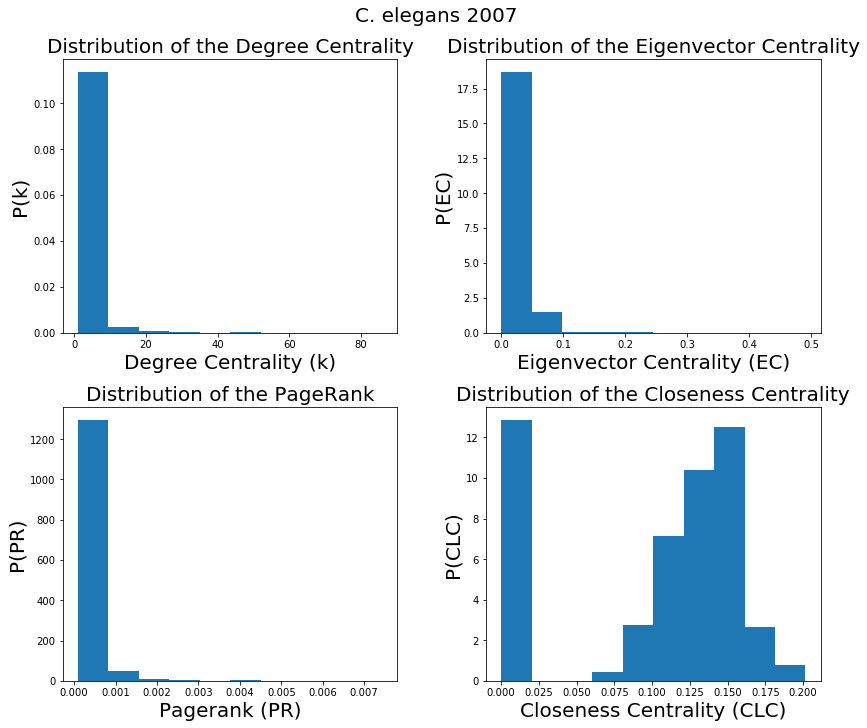

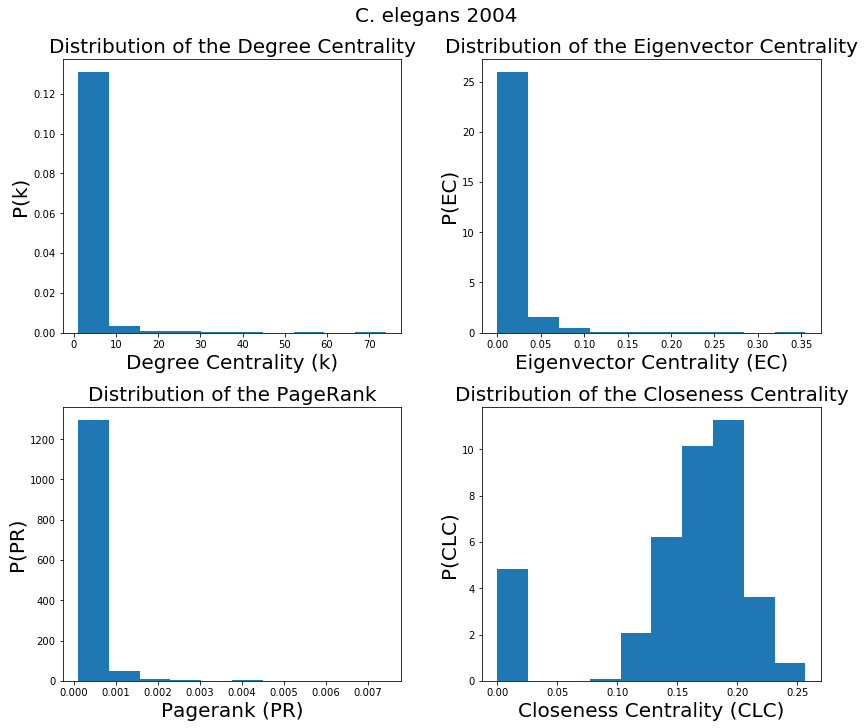

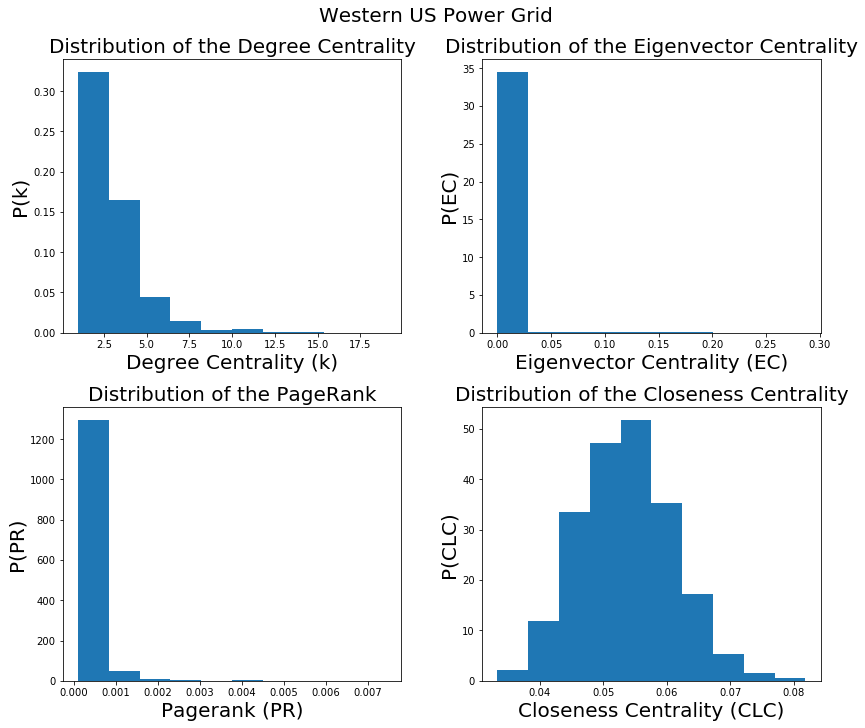

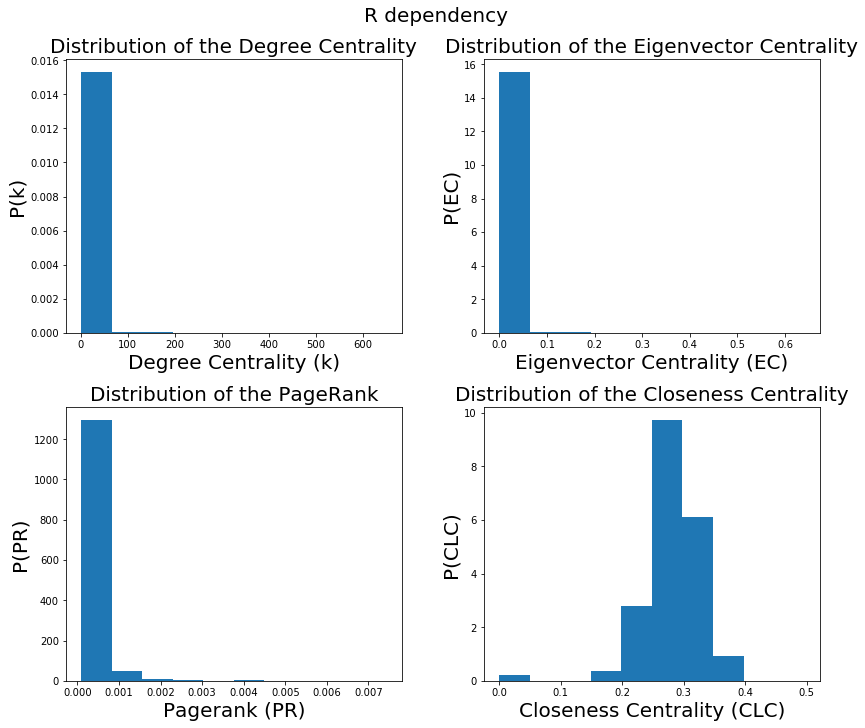

In [39]:
plot_dist(vk_proteins, EC_proteins, PR_proteins, CLC_proteins, "Human Proteins")
plot_dist(vk_elegans07, EC_elegans07, PR_elegans07, CLC_elegans07, "C. elegans 2007")
plot_dist(vk_elegans04, EC_elegans04, PR_elegans04, CLC_elegans04, "C. elegans 2004")
plot_dist(vk_power, EC_power, PR_power, CLC_power, "Western US Power Grid")
plot_dist(vk_Rdep, EC_Rdep, PR_Rdep, CLC_Rdep, "R dependency")

Ao analisar as distribuições de cada rede, é possível perceber grande semelhança entre as medidas de redes biológicas. Estas apresentam maior probabilidade de um nó ter menor degree centrality, bem como maior probabilidade de um nó apresentar menor pagerank (próximo de 0). Ou seja, seus nós apresentação poucas conexões e estas poucas conexões são feitas com nós pouco importantes. 

Já nas redes de tecnologia, podemos observar menores valores de Eigenvector Centrality e Pagerank. No entanto, não é possível estabelecer uma relação entre o Degree e Closenness Centrality.

[Voltar para o topo](#lista)

## <a id="4">EX4</a>

Vamos ler as redes novamente

In [25]:
proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()
proteins.remove_edges_from(nx.selfloop_edges(proteins))

power = nx.Graph()
power = nx.nx.read_gml('redes/power.gml', label=None)
power = power.to_undirected()
power = nx.convert_node_labels_to_integers(power, first_label=0)
power.remove_edges_from(nx.selfloop_edges(power))

elegans07 = nx.Graph()
elegans07 = nx.read_edgelist("redes/wi2007.txt", nodetype=str)
elegans07 = elegans07.to_undirected()
elegans07 = nx.convert_node_labels_to_integers(elegans07, first_label=0)
elegans07.remove_edges_from(nx.selfloop_edges(elegans07))

elegans04 = nx.Graph()
elegans04 = nx.read_edgelist("redes/wi2004.txt", nodetype=str)
elegans04 = elegans04.to_undirected()
elegans04 = nx.convert_node_labels_to_integers(elegans04, first_label=0)
elegans04.remove_edges_from(nx.selfloop_edges(elegans04))

df = pd.read_csv('redes/rdependencies.csv')
Rdep = nx.Graph()
Rdep = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr=None)
Rdep = Rdep.to_undirected()
Rdep.remove_edges_from(nx.selfloop_edges(Rdep))

In [11]:
vk_proteins = dict(proteins.degree())
vk_proteins = list(vk_proteins.values())

vk_elegans07 = dict(elegans07.degree())
vk_elegans07 = list(vk_elegans07.values())

vk_elegans04 = dict(elegans04.degree())
vk_elegans04 = list(vk_elegans04.values())

vk_power = dict(power.degree())
vk_power = list(vk_power.values())

vk_Rdep = dict(Rdep.degree())
vk_Rdep = list(vk_Rdep.values())

In [26]:
kc_proteins = dict(nx.core_number(proteins))
kc_proteins = list(kc_proteins.values())

kc_elegans07 = dict(nx.core_number(elegans07))
kc_elegans07 = list(kc_elegans07.values())

kc_elegans04 = dict(nx.core_number(elegans04))
kc_elegans04 = list(kc_elegans04.values())

kc_power = dict(nx.core_number(power))
kc_power = list(kc_power.values())

kc_Rdep = dict(nx.core_number(Rdep))
kc_Rdep = list(kc_Rdep.values())

In [27]:
CLC_proteins = dict(nx.closeness_centrality(proteins))
CLC_proteins = list(CLC_proteins.values())

CLC_elegans07 = dict(nx.closeness_centrality(elegans07))
CLC_elegans07 = list(CLC_elegans07.values())

CLC_elegans04 = dict(nx.closeness_centrality(elegans04))
CLC_elegans04 = list(CLC_elegans04.values())

CLC_power = dict(nx.closeness_centrality(power))
CLC_power = list(CLC_power.values())

CLC_Rdep = dict(nx.closeness_centrality(Rdep))
CLC_Rdep = list(CLC_Rdep.values())

In [28]:
BC_proteins = dict(nx.betweenness_centrality(proteins))
BC_proteins = list(BC_proteins.values())

BC_elegans07 = dict(nx.betweenness_centrality(elegans07))
BC_elegans07 = list(BC_elegans07.values())

BC_elegans04 = dict(nx.betweenness_centrality(elegans04))
BC_elegans04 = list(BC_elegans04.values())

BC_power = dict(nx.betweenness_centrality(power))
BC_power = list(BC_power.values())

BC_Rdep = dict(nx.betweenness_centrality(Rdep))
BC_Rdep = list(BC_Rdep.values())

In [30]:
EC_proteins = dict(nx.eigenvector_centrality(proteins, max_iter = 1000))
EC_proteins = list(EC_proteins.values())

EC_power = dict(nx.eigenvector_centrality(power, max_iter = 1000))
EC_power = list(EC_power.values())

EC_elegans07 = dict(nx.eigenvector_centrality(elegans07, max_iter = 1000))
EC_elegans07 = list(EC_elegans07.values())

EC_elegans04 = dict(nx.eigenvector_centrality(elegans04, max_iter = 1000))
EC_elegans04 = list(EC_elegans04.values())

EC_Rdep = dict(nx.eigenvector_centrality(Rdep, max_iter = 1000))
EC_Rdep = list(EC_Rdep.values())

In [33]:
PR_proteins = dict(nx.pagerank(proteins, alpha=0.85))
PR_proteins = list(PR_proteins.values())

PR_power = dict(nx.pagerank(power, alpha=0.85))
PR_power = list(PR_power.values())

PR_elegans07 = dict(nx.pagerank(elegans07, alpha=0.85))
PR_elegans07 = list(PR_elegans07.values())

PR_elegans04 = dict(nx.pagerank(elegans04, alpha=0.85))
PR_elegans04 = list(PR_elegans04.values())

PR_Rdep = dict(nx.pagerank(Rdep, alpha=0.85))
PR_Rdep = list(PR_Rdep.values())

In [35]:
RW_proteins = acc(proteins)
RW_power = acc(power)
RW_elegans07 = acc(elegans07)
RW_elegans04 = acc(elegans04)
RW_Rdep = acc(Rdep)

In [36]:
CC_proteins = comm_cent(proteins)
CC_power = comm_cent(power)
CC_elegans07 = comm_cent(elegans07)
CC_elegans04 = comm_cent(elegans04)
CC_Rdep = comm_cent(Rdep)

In [76]:
import statistics
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def calc_measures(data, name, network_name, G):
    mean = statistics.mean(data)
    stdev = statistics.stdev(data)
    k2 = momment_of_degree_distribution(G, 2)
    se = shannon_entropy(G)
    
    dataframe = pd.DataFrame({'mean_'+name: mean, 'stdev_'+name: stdev, 'k2_'+name: k2, 'entropy_'+name: se}, index=[network_name])
    return dataframe

In [84]:
df_proteins = pd.concat([calc_measures(vk_proteins, 'average', 'proteins', proteins), 
                         calc_measures(kc_proteins, 'k-core', 'proteins', proteins),
                         calc_measures(CLC_proteins, 'closeness centrality', 'proteins', proteins),
                         calc_measures(BC_proteins, 'betweenness centrality', 'proteins', proteins),
                         calc_measures(EC_proteins, 'eigenvector centrality', 'proteins', proteins),
                         calc_measures(PR_proteins, 'pagerank', 'proteins', proteins), 
                         calc_measures(RW_proteins, 'random walk', 'proteins', proteins),
                         calc_measures(CC_proteins, 'communicability centrality', 'proteins', proteins)], axis=1)

In [86]:
df_power = pd.concat([calc_measures(vk_power, 'average', 'power', power), 
                         calc_measures(kc_power, 'k-core', 'power', power),
                         calc_measures(CLC_power, 'closeness centrality', 'power', power),
                         calc_measures(BC_power, 'betweenness centrality', 'power', power),
                         calc_measures(EC_power, 'eigenvector centrality', 'power', power),
                         calc_measures(PR_power, 'pagerank', 'power', power), 
                         calc_measures(RW_power, 'random walk', 'power', power),
                         calc_measures(CC_power, 'communicability centrality', 'power', power)], axis=1)

In [88]:
df_elegans07 = pd.concat([calc_measures(vk_elegans07, 'average', 'elegans07', elegans07), 
                         calc_measures(kc_elegans07, 'k-core', 'elegans07', elegans07),
                         calc_measures(CLC_elegans07, 'closeness centrality', 'elegans07', elegans07),
                         calc_measures(BC_elegans07, 'betweenness centrality', 'elegans07', elegans07),
                         calc_measures(EC_elegans07, 'eigenvector centrality', 'elegans07', elegans07),
                         calc_measures(PR_elegans07, 'pagerank', 'elegans07', elegans07), 
                         calc_measures(RW_elegans07, 'random walk', 'elegans07', elegans07),
                         calc_measures(CC_elegans07, 'communicability centrality', 'elegans07', elegans07)], axis=1)

In [89]:
df_elegans04 = pd.concat([calc_measures(vk_elegans04, 'average', 'elegans04', elegans04), 
                         calc_measures(kc_elegans04, 'k-core', 'elegans04', elegans04),
                         calc_measures(CLC_elegans04, 'closeness centrality', 'elegans04', elegans04),
                         calc_measures(BC_elegans04, 'betweenness centrality', 'elegans04', elegans04),
                         calc_measures(EC_elegans04, 'eigenvector centrality', 'elegans04', elegans04),
                         calc_measures(PR_elegans04, 'pagerank', 'elegans04', elegans04), 
                         calc_measures(RW_elegans04, 'random walk', 'elegans04', elegans04),
                         calc_measures(CC_elegans04, 'communicability centrality', 'elegans04', elegans04)], axis=1)

In [90]:
df_Rdep = pd.concat([calc_measures(vk_Rdep, 'average', 'Rdep', Rdep), 
                         calc_measures(kc_Rdep, 'k-core', 'Rdep', Rdep),
                         calc_measures(CLC_Rdep, 'closeness centrality', 'Rdep', Rdep),
                         calc_measures(BC_Rdep, 'betweenness centrality', 'Rdep', Rdep),
                         calc_measures(EC_Rdep, 'eigenvector centrality', 'Rdep', Rdep),
                         calc_measures(PR_Rdep, 'pagerank', 'Rdep', Rdep), 
                         calc_measures(RW_Rdep, 'random walk', 'Rdep', Rdep),
                         calc_measures(CC_Rdep, 'communicability centrality', 'Rdep', Rdep)], axis=1)

In [120]:
df = pd.concat([df_proteins, df_power, df_elegans07, df_elegans04, df_Rdep])
df

,mean_average,stdev_average,k2_average,entropy_average,mean_k-core,stdev_k-core,k2_k-core,entropy_k-core,mean_closeness centrality,stdev_closeness centrality,...,k2_pagerank,entropy_pagerank,mean_random walk,stdev_random walk,k2_random walk,entropy_random walk,mean_communicability centrality,stdev_communicability centrality,k2_communicability centrality,entropy_communicability centrality
proteins,3.925311,6.724902,60.617938,3.167232,2.170763,1.472789,60.617938,3.167232,0.166470,0.063853,...,60.617938,3.167232,2.286222,1.705765,60.617938,3.167232,2.750118e+03,2.511855e+04,60.617938,3.167232
power,2.669095,1.791454,10.332726,2.455227,1.735074,0.576218,10.332726,2.455227,0.053679,0.007379,...,10.332726,2.455227,2.330406,0.978852,10.332726,2.455227,4.320384e+00,8.138725e+00,10.332726,2.455227
elegans07,2.291444,4.379256,24.415775,2.015495,1.321524,0.716899,24.415775,2.015495,0.099243,0.061448,...,24.415775,2.015495,2.026615,1.140064,24.415775,2.015495,2.429089e+01,1.600683e+02,24.415775,2.015495
elegans04,2.725950,5.158342,34.017785,2.291312,1.522231,0.836389,34.017785,2.291312,0.153235,0.063325,...,34.017785,2.291312,2.093874,1.259054,34.017785,2.291312,7.933718e+01,5.296229e+02,34.017785,2.291312
Rdep,4.411003,16.944841,306.590854,2.994351,2.358964,1.320440,306.590854,2.994351,0.282339,0.049632,...,306.590854,2.994351,2.065994,1.594126,306.590854,2.994351,2.026072e+08,4.155004e+09,306.590854,2.994351


In [ ]:
%%bash
pip install sklearn

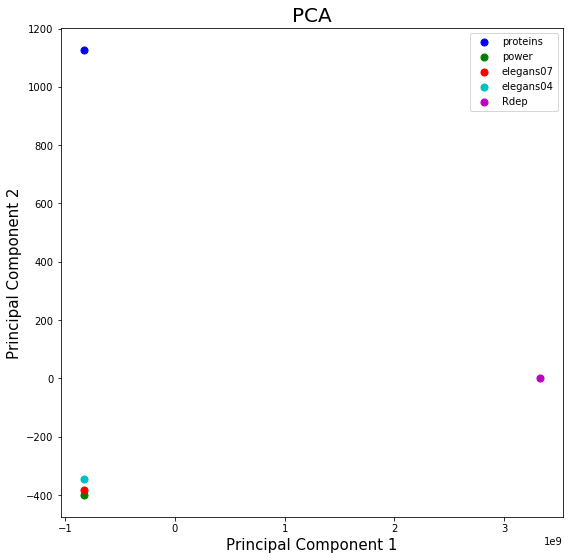

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_pca(dataframe):
    x = dataframe.values
    y = dataframe.index
    
    networks = ['proteins','power','elegans07','elegans04','Rdep']
    
    pca = PCA(n_components=2)
    principal = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principal, columns = ['pc 1', 'pc 2'], index=networks)

    finalDf = pd.concat([principalDf], axis=1)
    
    fig = plt.figure(figsize = (9,9))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('PCA', fontsize = 20)
    
    colors = ['b', 'g', 'r', 'c', 'm']
    
    
    for target, color in zip(networks, colors):
        index = finalDf.index == target
        ax.scatter(finalDf.loc[index, 'pc 1'], finalDf.loc[index, 'pc 2'], c = color, s = 50)
        
    ax.legend(networks)
    ax.grid
    
    
plot_pca(df)

[Voltar para o topo](#lista)

## <a id="5">EX5</a>

In [289]:
eroad = nx.Graph()
eroad = nx.read_edgelist('redes/euroad', nodetype=int, comments='%')
eroad = eroad.to_undirected()

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('redes/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)

airport = nx.Graph()
airport = nx.read_edgelist("redes/USairport500.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()

proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

eroad_cc = max(nx.connected_component_subgraphs(eroad), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport), key=len)
proteins_cc = max(nx.connected_component_subgraphs(proteins), key=len)

Função que calcula o Knn e plota os dados

In [292]:
def knn(G):
    knn = []
    for i in G.nodes():
        aux =  nx.average_neighbor_degree(G, nodes = [i])
        knn.append(float(aux[i]))
    knn = np.array(knn)
    
    vk = dict(G.degree())
    vk = list(vk.values())
    
    knnk = list()
    ks = list()
    for k in arange(np.min(vk), np.max(vk)):
        aux = vk == k
        if(len(knn[aux]) > 0):
            av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
            knnk.append(av_knn)
            ks.append(k)
            
    return ks, knnk

def plot_knn(ks, knnk):
    plt.plot(ks, knnk, 'ro')
    #plt.loglog(ks,knnk,'bo',basex=10,basey=10)
    #plt.title("Average neighborhood connectivity vs degree")
    plt.ylabel("knn(k)")
    plt.xlabel("k")
    plt.grid(True)
#     plt.savefig('knnk.eps')

    # determine best fit line
    par = np.polyfit(ks, knnk, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(ks), max(ks)]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, '-b')
#     plt.savefig('knn.eps') #save the figure into a file
    plt.show(True)  

### (i) E-Road

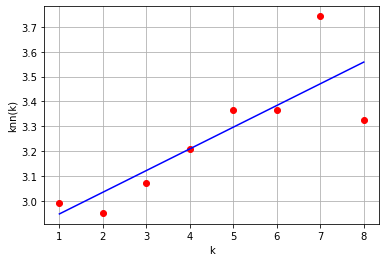

Pearson correlation coefficient: 0.8296047846722235
Assortativity coefficient: 0.09003981380055641


In [295]:
ks, knnk = knn(eroad_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(eroad_cc)
print('Assortativity coefficient:', assort)

### (ii) C. elegans

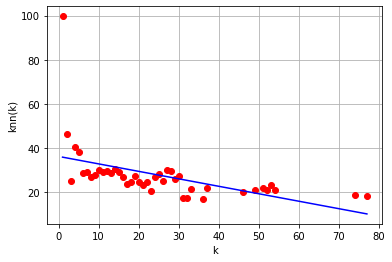

Pearson correlation coefficient: -0.4947811319324024
Assortativity coefficient: -0.16319921031570409


In [296]:
ks, knnk = knn(elegans_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(elegans_cc)
print('Assortativity coefficient:', assort)

### (iii) US Airport

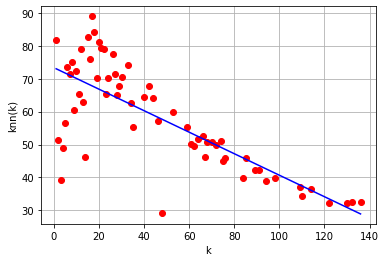

Pearson correlation coefficient: -0.7756491513624391
Assortativity coefficient: -0.26786294344854117


In [297]:
ks, knnk = knn(airport_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(airport_cc)
print('Assortativity coefficient:', assort)

### (iv) Human proteins

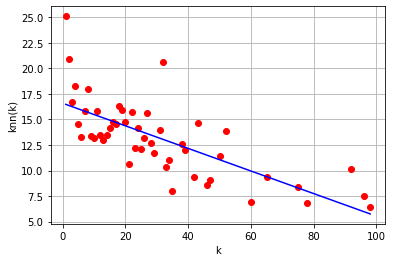

Pearson correlation coefficient: -0.7256770699514126
Assortativity coefficient: -0.12930627529725475


In [298]:
ks, knnk = knn(proteins_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(proteins_cc)
print('Assortativity coefficient:', assort)

[Voltar para o topo](#lista)

## <a id="6">EX6</a>

Primeiro vamos instalar o Louvain method com o seguinte comando:

In [ ]:
%%bash
pip install python-louvain

Vamos criar a rede usando Givan-Newman benchmark 

In [72]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k = 16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

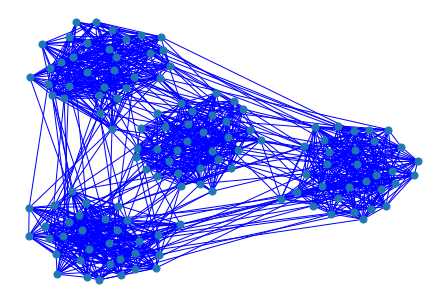

In [73]:
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)

In [97]:
def plot_community(c, title, G):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(title)
    aux = 0
    for cm in c:
        nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                         with_labels = False, node_size=50)
        aux = aux + 1
#     plt.show(True)
    return plt

In [98]:
def draw_louvain(partition, G):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    size = float(len(set(partition.values())))
    count = 0.
    plt.title("Louvain")
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [100]:
greedy = list(greedy_modularity_communities(G))

communities = community.girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(communities)
girvan = sorted(map(sorted, next_level_communities))

label = community.label_propagation_communities(G)
   
partition = community_louvain.best_partition(G)

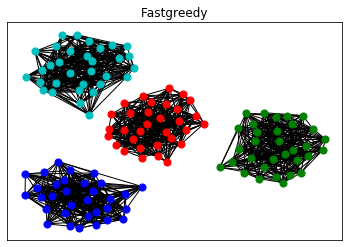

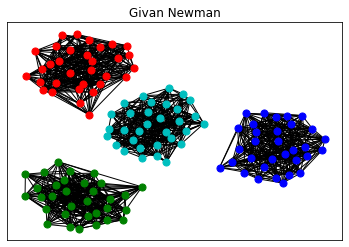

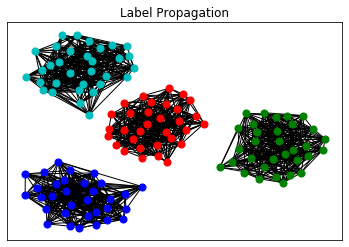

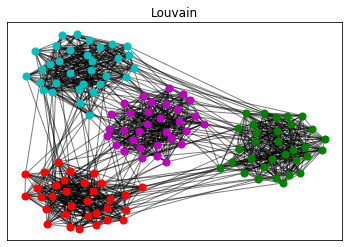

In [101]:
img = plot_community(greedy, "Fastgreedy", G)
plot_community(girvan, "Givan Newman", G)
plot_community(label, "Label Propagation", G)
img.show(True)
draw_louvain(partition, G)

[Voltar para o topo](#lista)

## <a id="7">EX7</a>

In [54]:
from community import community_louvain
karate = nx.karate_club_graph()
karate = karate.to_undirected()
karate = nx.convert_node_labels_to_integers(karate, first_label=0)
pos=nx.nx.fruchterman_reingold_layout(G)

In [102]:
greedy = list(greedy_modularity_communities(karate))

communities = community.girvan_newman(karate)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
girvan = sorted(map(sorted, next_level_communities))

label = community.label_propagation_communities(karate)
   
partition = community_louvain.best_partition(karate)

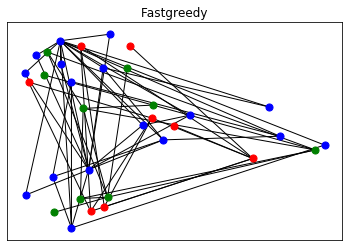

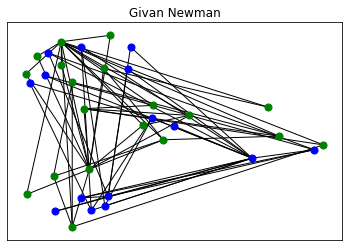

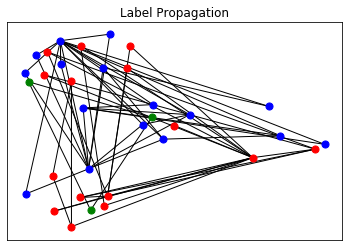

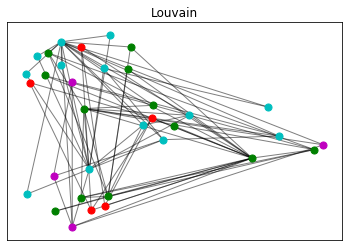

In [103]:
img = plot_community(greedy, "Fastgreedy", karate)
plot_community(girvan, "Givan Newman", karate)
plot_community(label, "Label Propagation", karate)
img.show(True)
draw_louvain(partition, karate)

[Voltar para o topo](#lista)

## <a id="8">EX8</a>

In [10]:
N = 1000
tau1 = 3
tau2 = 1.5
mu = 0.04
k = 16
minc = 32
maxc = 50
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

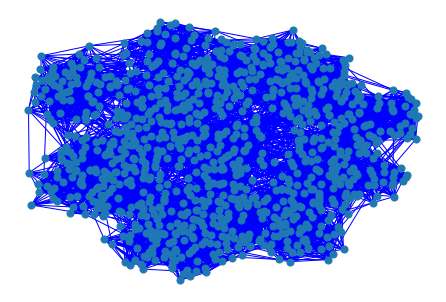

In [12]:
nx.draw(G, with_labels = False, edge_color='b', node_size=50, font_size=16, width=1)

[Voltar para o topo](#lista)

## <a id="9">EX9</a>

Primeiro temos que ler as redes

In [262]:
eroad = nx.Graph()
eroad = nx.read_edgelist('redes/euroad', nodetype=int, comments='%')
eroad = eroad.to_undirected()

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('redes/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)

airport = nx.Graph()
airport = nx.read_edgelist("redes/USairport500.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()

proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

eroad_cc = max(nx.connected_component_subgraphs(eroad), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport), key=len)
proteins_cc = max(nx.connected_component_subgraphs(proteins), key=len)

Vamos calcular o número de nós, o grau médio, o coeficiente de assortatividade, e o tamanho médio do menor caminho.

In [263]:
nodes = [len(eroad), len(elegans), len(airport), len(proteins)]

In [271]:
degree = [2*eroad.number_of_edges()/nodes[0], 2*elegans.number_of_edges()/nodes[1], 2*airport.number_of_edges()/nodes[2], 2*proteins.number_of_edges()/nodes[3]]

In [273]:
assort = [nx.degree_assortativity_coefficient(eroad_cc), nx.degree_assortativity_coefficient(elegans_cc), nx.degree_assortativity_coefficient(airport_cc), nx.degree_assortativity_coefficient(proteins_cc)]

In [269]:
av_path = [nx.average_shortest_path_length(eroad_cc), nx.average_shortest_path_length(elegans_cc), nx.average_shortest_path_length(airport_cc), nx.average_shortest_path_length(proteins_cc)]

Antes precisamos criar os arquivos que contem a lista de arestas para serem lidos pelo programa que irá realizar os cálculos

In [286]:
nx.write_edgelist(eroad, "redes/eroad.pairs")
nx.write_edgelist(elegans, "redes/elegans.pairs")
nx.write_edgelist(airport, "redes/airport.pairs")
nx.write_edgelist(proteins, "redes/proteins.pairs")

Vamos agora calcular as modularidades, primeiro pelo método Fastgreedy

In [287]:
str_command1 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'euroad' + '.pairs'
str_command2 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'elegans' + '.pairs'
str_command3 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'airport' + '.pairs'
str_command4 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'proteins' + '.pairs'

fast = [os.system(str_command1 + ' -l firstRun'), os.system(str_command2 + ' -l firstRun'), os.system(str_command3 + ' -l firstRun'), os.system(str_command4 + ' -l firstRun')]

Com estes resultados obtemos a seguinte tabela:

In [288]:
display(pd.DataFrame({'N': nodes, 'Average Degree': degree, 'Assortativity Coefficient': assort, 'Av. Shortest path': av_path, 'Fastgreedy': fast}, index=['E-road', 'C. Elegans', 'US Airports', 'Human Proteins']))

,N,Average Degree,Assortativity Coefficient,Av. Shortest path,Fastgreedy
E-road,1174,2.413969,0.090040,18.395146,512
C. Elegans,297,14.464646,-0.163199,2.455319,512
US Airports,500,11.920000,-0.267863,2.991030,512
Human Proteins,3133,4.293648,-0.129306,4.839802,512


[Voltar para o topo](#lista)

## <a id="10">EX10</a>

Write a code to create plots showing the threshold phenomenon for existence of isolated vertices. Use the Erdos Renyi to create the random graphs (https://networkx.github.io/documentation/stable/auto_examples/graph/plot_erdos_renyi.html)

In [28]:
def plot_threshold():
    n = 100
    probabilities = []
    averageIsolates = []
    for i in range(0,100):
        p = float(i)/100
        probabilities.append(p)
        isolated = float(0)
        for j in range(1, 101):
            er = nx.erdos_renyi_graph(n, p)
            isolated += len(list(nx.isolates(er)))
        isolated /= j
        averageIsolates.append(isolated)
    plt.scatter(probabilities, averageIsolates)
    plt.show()
    plt.semilogx(probabilities, averageIsolates)
    plt.show()

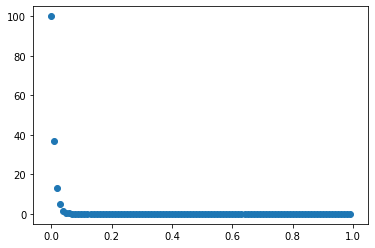

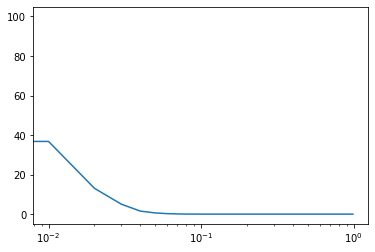

In [29]:
plot_threshold()

[Voltar para o topo](#lista)